In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
data = pd.read_csv('../../../data_frames/umn_foursquare_datasets/checkins.dat', sep = '|').dropna()

FileNotFoundError: [Errno 2] No such file or directory: '../../../data_frames/umn_foursquare_datasets/checkins.dat'

In [125]:
data

,id,user_id,venue_id,latitude,longitude,created_at
0,984222,15824.0,5222.0,38.895112,-77.036366,2012-04-21 17:43:47
1,984234,44652.0,5222.0,33.800745,-84.410520,2012-04-21 17:43:43
2,984291,105054.0,5222.0,45.523452,-122.676207,2012-04-21 17:39:22
3,984318,2146539.0,5222.0,40.764462,-111.904565,2012-04-21 17:35:46
4,984232,93870.0,380645.0,33.448377,-112.074037,2012-04-21 17:38:18
...,...,...,...,...,...,...
99995,123888,1019078.0,1105563.0,33.575000,-117.725556,2011-12-11 05:38:19
99996,124366,771129.0,329847.0,37.629349,-122.400087,2011-12-11 04:55:34
99997,125556,804990.0,254046.0,29.762884,-95.383061,2011-12-11 06:54:20
99998,127250,526214.0,34473.0,32.802955,-96.769923,2011-12-11 10:05:38


In [14]:
data.columns = [col.strip() for col in data.columns]

In [34]:
data = data[(data.longitude != '                   ') & (data.latitude != '                   ')]

In [36]:
data = data.astype({'longitude':'float64', 'latitude':'float64'})

In [44]:
data = data.reset_index().drop('index', axis=1)

In [52]:
data = data.iloc[:100000, :]

In [55]:
ms = MeanShift(bandwidth=0.1)
ms.fit(data[['longitude', 'latitude']])

MeanShift(bandwidth=0.1)

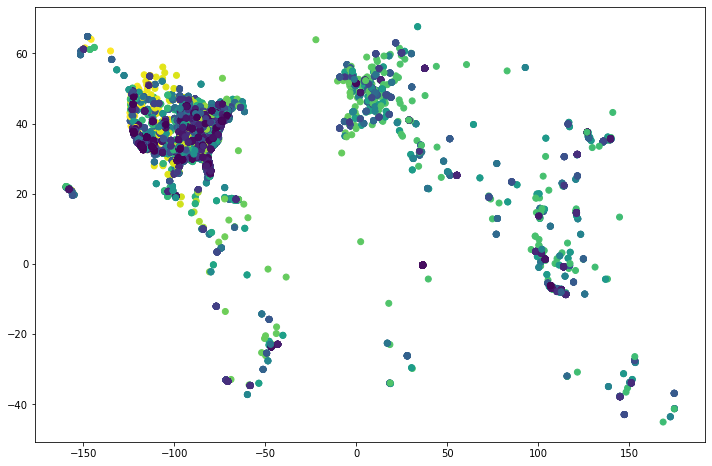

In [64]:
plt.scatter(data['longitude'], data['latitude'], c = ms.labels_)

In [68]:
labels, counts = np.unique(ms.labels_, return_counts=True)

In [70]:
good_labels = [label for label in labels if counts[label] >= 15]

In [73]:
offices = [[33.751277, -118.188740],
[25.867736, -80.324116],
[51.503016, -0.075479],
[52.378894, 4.885084],
[39.366487, 117.036146],
[-33.868457, 151.205134]]

In [146]:
clust_centers = pd.DataFrame(ms.cluster_centers_[good_labels]).rename({1:'latitude', 0:'longitude'}, axis=1)

In [147]:
best_clusters = []
for office in offices:
    best_clusters.append((np.linalg.norm(clust_centers[['latitude', 'longitude']] - office, axis = 1).min(),
          np.linalg.norm(clust_centers[['latitude', 'longitude']] - office, axis = 1).argmin()))

In [152]:
long, lat = clust_centers.iloc[best_clusters[3][1], :]

In [155]:
with open('answer.txt','w') as file:
    file.write(str(lat) + ' ' + str(long))